# Ast 266, Imran Hasan, HW3

In [1]:
from astropy.io import ascii
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

/Users/ih64/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Problem 1: Using CDF to draw from non-standard PDF 

$P(y)$ must be normalized so that $\int_0^1 P(y) \, $d$y = 1$

$\int_0^1 ky \,$d$y$ = k/2 = 1, so k = 2

now we invert this equation to solve for y(x)

$x = F(y) = \int_0^y 2y' $d$y' = y^2 $

$\sqrt{x} = y(x)$

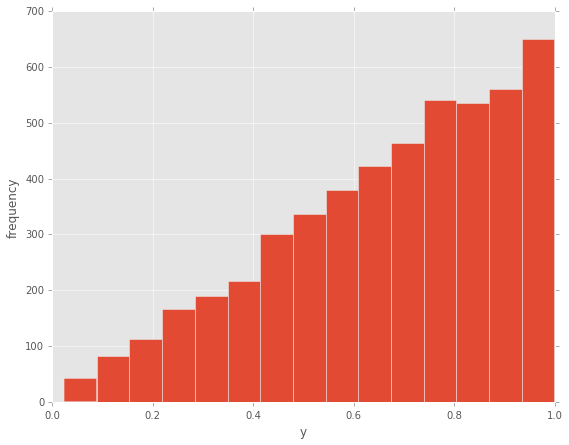

In [18]:
#sample 5000 points from a uniform distribution
x=np.random.random(5000)
#invert them using the expression we found above to get our y's
y=np.sqrt(x)
#lets plot a histogram to see if we get the triangular PDF we want
plt.figure(figsize=(9,7))
plt.hist(y, bins=15)
plt.ylabel('frequency')
plt.xlabel('y')

## Problem 2: Transformation of variables, cartesian to polar

### a) Determine p(r) 

x and y are indepedent variables, so the joing probability p(x,y) is can be written as p(x)p(y)
x and y are both gausian random variables with zero mean and the same variance $\sigma^2$. 
we may write p(x)p(y) = 

$$\frac{1}{\sqrt{2 \pi \sigma^2}} \exp(\frac{-x^2}{2\sigma^2}) \frac{1}{\sqrt{2 \pi \sigma^2}} \exp(\frac{-y^2}{2\sigma^2})$$

To transform to polar coordinates to get $p(r,\theta)$ we must calculate the Jacobian. First we remember the relationships between $x, y, r,$ and $\theta$

$$x(r,\theta) = r\cos\theta ,\ y(r,\theta)= r\sin\theta $$ 

$$ \frac{\mathrm{d}x}{\mathrm{d}r} = \cos\theta ,\  \frac{\mathrm{d}y}{\mathrm{d}r} = \sin\theta$$

$$ \frac{\mathrm{d}x}{\mathrm{d}\theta} = -r\sin\theta ,\  \frac{\mathrm{d}y}{\mathrm{d}\theta} = r\cos\theta$$

Now we may construct the Jacobian

$$ J = 
\begin{pmatrix}
\cos\theta & -r\sin\theta \\
\sin\theta & r\cos\theta \\
\end{pmatrix}
$$

Whose determinant is equal to $r$. Using this we may express 

$$p(r,\theta) = \frac{r}{2\pi\sigma^2}\exp(\frac{-r^2}{2\sigma^2}) $$

We may marganalize this PDF to get $p(r)$ only. To do this we integrate over the unwanted variable

$$ p(r) = \int_0^{2\pi} \frac{r}{2\pi\sigma^2}\exp(\frac{-r^2}{2\sigma^2}) \mathrm{d}\theta $$

$$=  \frac{r}{\sigma^2}\exp(\frac{-r^2}{2\sigma^2}) $$



### b) Determine $\sigma$ 

we are told the sattelite has a 90% error radius of 3 arc seconds. So if we integrate p(r) from 0 to 3 arc seconds we expect to have 90% of the area under the curve.

$$\int_0^3 \frac{r}{\sigma^2}\exp(\frac{-r^2}{2\sigma^2}) \mathrm{d}r = .9 $$

now do a u substitution. let $u = \frac{r^2}{2\sigma^2} $ so that $\mathrm{d}u = \frac{r}{\sigma^2} \mathrm{d}r$

$$ .9 = \int_{u1}^{u2} \exp(-u) \mathrm{d}u  = -\exp(-u) \Big|_{u1}^{u2}$$

putting back our definition of u and our limits we have

$$ 0.9 = -\exp(\frac{-r^2}{2\sigma^2}) \Big|_0^3 $$

$$ .1 = \exp(\frac{-9}{2\sigma^2}) $$ 

$$ -\ln(.1)\frac{2}{9} = \frac{1}{\sigma^2} $$

$$ \frac{9}{2\ln(10)} = \sigma^2$$

finally we have $\sigma = \sqrt{\frac{9}{2\ln(10)}} \approx 1.398 $

### c) check your answer numerically

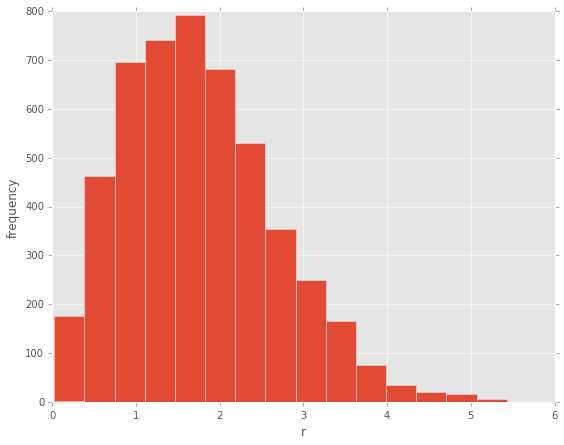

In [16]:
#first lets define x and y by drawing 5000 samples from a gaussian pdf
#with mean = 0 and variance = to what we found above

sig=3.0/np.sqrt(2 * np.log(10))
x=np.random.normal(0,sig,5000)
y=np.random.normal(0,sig,5000)

#now define r
r = np.sqrt(np.square(x) + np.square(y))

#lets plot up a histogram of r to see if it looks the way we expect
#we expect something like r*exp(-r^2 / 2sigma)
plt.figure(figsize=(9,7))
plt.hist(r, bins=15)
plt.xlabel('r')
plt.ylabel('frequency')

In [12]:
#to determine what percentage of points is inside 3 arc seconds
#let us mask out those values which are inside 3 arcseconds and then do some accounting

mask=r>=3
num_out=r[mask].size
frac_out = float(num_out/5000.0)
percent_out = 100*frac_out
percent_in=100-percent_out
print "%.3f percentage of the points are inside 3 arc seconds" %percent_in

89.500 percentage of the points are inside 3 arc seconds


We expected a result of 90%, and got a result one half of a percentage away from the prediction

## Problem 3: Covariance, correlation, and hypothesis testing

In [20]:
#read in the data
table=ascii.read('lx_t.dat')

#define our variables
x=np.log10(table['L'].data)
y=np.log10(table['T'].data)
x_bar = x.mean()
y_bar = y.mean()
N=x.size

#define departures from the mean. this will make some caluculations look neater below
x_dep=(x-x_bar)
y_dep=(y-y_bar)

#calculate covariances. We use a vectorized scheme using matrix multiplication
#remember its symmetric so Cxy = Cyx
Cxx=x_dep.dot(x_dep.T)/N
Cyy=y_dep.dot(y_dep.T)/N
Cxy=x_dep.dot(y_dep.T)/N

#r can be constructed from the values we calculated
r=Cxy/(np.sqrt(Cxx*Cyy))

print "the elements of the Covariance Matrix are Cxx = %.3f Cyy = %.3f and Cxy = Cyx = %.3f" %(Cxx, Cyy, Cxy)
print "the value of our r statistic is %.3f" %r

the elements of the Covariance Matrix are Cxx = 1.048 Cyy = 0.084 and Cxy = Cyx = 0.266
the value of our r statistic is 0.897


In [21]:
#we calculate sigma for the distribution, assuming gaussian errors
sig_gaus=1/np.sqrt(N)

#now find how many sigma r is worth
print "our r statistic is %.3f sigma away from the mean" %(r/sig_gaus)

our r statistic is 14.819 sigma away from the mean


the r statistic is ~14.8 $\sigma$ away from the mean. A 95% level would be about 2 $\sigma$. Our result is well above this threshold. As a result, we reject the null hypothesis that there is no correlation at the 95% level

our values for a and b are -10.174 and 0.242 respectively


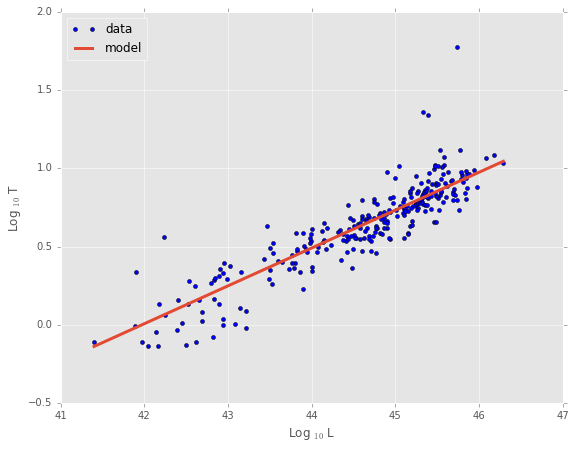

In [22]:
#here we define the model parameters a and b that are defined in class.
a= y_bar - ((Cxy)/(Cxx**2))*x_bar

b=((Cxy)/(Cxx**2))

#using these we can make predictions for our model
#copy over the xdata
x_model = x.copy()
#sort the x data. this makes it ordered nicely when plotted
x_model.sort()
#use the x inputs to make y value predictions from our model
y_model =  a + b*x_model

plt.figure(figsize=(9,7))
plt.xlabel('Log $_{10}$ L')
plt.ylabel('Log $_{10}$ T')
plt.plot(x, y, 'bo', ms=4.0, label='data')
plt.plot(x_model, y_model, linewidth=3.0, label='model')
plt.legend(loc="upper left")

print "our values for a and b are %.3f and %.3f respectively" %(a, b)